# Определение закономерности успешной игры

В нашем распоряжении данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й.

### План работ по анализу данных о продажах игр

<div class="alert alert-info" role="alert">
В нашем распоряжении данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Массив данных содержит информацию о названиях игр, платформах, годах выпуска, жанрах игры, продажах в Северной Америке (миллионы проданных копий), Европе (миллионы проданных копий), Японии (миллионы проданных копий) и в других странах (миллионы проданных копий), оценках критиков, оценках пользователей и рейтинге от организации ESRB. 
    
Шаг 1. Откроем файлы с данными, изучим общую информацию и сделаем выводы.

Шаг 2. Подготовка данных.
Заменим названия столбцов (приведем к нижнему регистру), постараемся заполнить пропуски по мере необходимости, подкорректировать тип данных и т.д.
Добавим необходимые столбцы для удобства анализа, сравнения и получения дополнительных данных.
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Шаг 3. Проведем исследовательский анализ данных.     
Посмотрим, сколько игр выпускалось в разные годы.
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы.
Возьмем данные за соответствующий актуальный период в результате исследования предыдущих вопросов и определим, какие платформы лидируют по продажам, растут и падают. Выберем несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Соотнесем выводы с продажами игр на других платформах.
Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры. Изучим, выделяются ли жанры с высокими и низкими продажами.
    
Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). Изучим разницу.
Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
    
Шаг 5. Проверим гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средние пользовательские рейтинги жанров Action и Sports разные.
    
Шаг 6. Напишим общий вывод
</div>

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("/datasets/games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Таблицы заполнены полностью в части названия типа платформы и продаж. Пропущены данные в 1,5% с годом выпуска. 40-50% пропусков в данных рейтингов и оценок критиков и пользователей.

### Шаг 2. Подготовка данных

Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
df.columns = map(str.lower, df.columns)
#df

Изучим наши данные датасета

In [5]:
for element in df.columns:
    display(df[element].value_counts())

Need for Speed: Most Wanted               12
Madden NFL 07                              9
FIFA 14                                    9
LEGO Marvel Super Heroes                   9
Ratatouille                                9
                                          ..
San Goku Shi V                             1
CIMA: The Enemy                            1
The King of Fighters 2006                  1
Midway Arcade Treasures: Extended Play     1
Ruff Trigger: The Vanocore Conspiracy      1
Name: name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: na_sales, Length: 402, dtype: int64

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: eu_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: jp_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1.9       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [6]:
for elem in df.columns:
    display(df[elem].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Два последних столбца с рейтингом и оценками пользователей имеют тип object. Для удобства дальнейших операций над датафреймом с этими столбцами добавим дополнительные столбцы, в которых неопределенные значения обозначим False.

In [8]:
df['user_score_rating'] = df['user_score'].fillna(False)
#df

In [9]:
df['rating_ESRB'] = df['rating'].fillna(False)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_rating,rating_ESRB
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False,False
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,False,False
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False,False


Определим сокращение 'tbd' в столбце user_score. Сокращение 'tbd' обозначает To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода".

In [10]:
df_tbd = df.query('user_score == "tbd"')
df_tbd['year_of_release'].unique()

array([2010., 2005., 2011.,   nan, 2009., 2004., 1999., 2001., 2008.,
       2007., 2003., 2000., 2006., 2002., 2015., 2014., 2012., 2013.,
       2016., 1997.])

Поскольку пропуски в данных рейтингов и оценок критиков и пользователей практически совпадают, изучим пропуски столбца critic_score.

In [11]:
df_cs = df.query('critic_score != "NaN"')
df_cs['year_of_release'].unique()

array([2006., 2008., 2009., 2005., 2007., 2010., 2013., 2004., 2002.,
       2001., 2011., 2012., 2014., 1997., 1999., 2015., 2016., 2003.,
       1998., 1996., 2000.,   nan, 1994., 1985., 1992., 1988.])

Датафреймы df_cs и df_tbd в части уникальных значений практически идентичны. До 1997 года не применялся данный рейтинг. Данные по сокращению tbd можно применить как неопределенные.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
df_region_sum = df.groupby(['year_of_release']).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum'], 'other_sales': ['sum']})
df_region_sum

,na_sales,eu_sales,jp_sales,other_sales
,sum,sum,sum,sum
year_of_release,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20


In [13]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_rating,rating_ESRB,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False,False,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False,False,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,False,False,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False,False,0.01


In [91]:
games_grouped = (df.groupby('platform')
                          .agg({'name': 'nunique'})
                          .reset_index()
                          .rename(columns = {'name': 'games_launched'})
                          .sort_values(by = 'games_launched', ascending = False) # напишите код
                          .head(10))

In [14]:
print('Количество продаж в Северной Америке, млн.: ', df['na_sales'].sum())

Количество продаж в Северной Америке, млн.:  4402.35


In [15]:
print('Количество продаж в Европе, млн.: ', df['eu_sales'].sum())

Количество продаж в Европе, млн.:  2424.67


In [16]:
print('Количество продаж в Японии, млн.: ', df['jp_sales'].sum())

Количество продаж в Японии, млн.:  1297.37


In [17]:
print('Количество продаж в остальных странах, млн.: ', df['other_sales'].sum())

Количество продаж в остальных странах, млн.:  791.32


Больше всего продаж в Северной Америке. Больше всего продаж было сделано в 2007-2010 годах, с этого времени они постоянно сокращаются.

### Вывод по Шагу 2

Мы произвели обработку исходного датафрейма. 
Заменили названия столбцов (привели к нижнему регистру).
Таблицы заполнены полностью в части названия типа платформы и продаж. Пропущены данные в 1,5% с годом выпуска. Эти данные оставляем без изменений.
Присутствуют 40-50% пропусков в данных рейтингов и оценок критиков и пользователей. Данным пропускам присвоили значение False в новых столбцах.
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
Больше всего продаж в Северной Америке. Больше всего продаж было сделано в 2007-2010 годах, с этого времени они постоянно сокращаются.

### Шаг 3. Проведем исследовательский анализ данных     

Посмотрим, сколько игр выпускалось в разные годы.

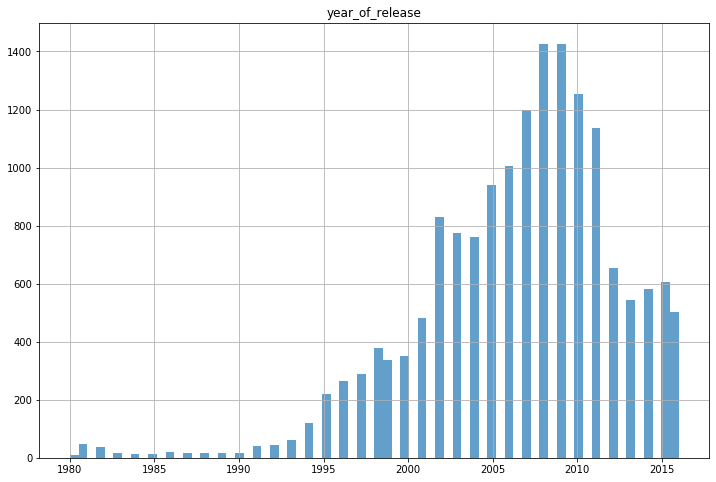

In [18]:
df.hist('year_of_release', bins=70, figsize=(12, 8), grid=True, alpha=.7);

In [19]:
df_games_year = df.loc[:, ['year_of_release', 'name']]
df_games_year_table = df_games_year.pivot_table(index='year_of_release', values='name', aggfunc='count')
print(df_games_year_table)

                 name
year_of_release      
1980.0              9
1981.0             46
1982.0             36
1983.0             17
1984.0             14
1985.0             14
1986.0             21
1987.0             16
1988.0             15
1989.0             17
1990.0             16
1991.0             41
1992.0             43
1993.0             60
1994.0            121
1995.0            219
1996.0            263
1997.0            289
1998.0            379
1999.0            338
2000.0            350
2001.0            482
2002.0            829
2003.0            775
2004.0            762
2005.0            939
2006.0           1006
2007.0           1197
2008.0           1427
2009.0           1426
2010.0           1255
2011.0           1136
2012.0            653
2013.0            544
2014.0            581
2015.0            606
2016.0            502


С 1980 по 1990 выпускалось незначительное количество игр. С 1990 по 2009 количество выпускаемых игр постоянно увеличивалось. Пик пришелся на 2008-2009 год: около 1400 впущенных игр в год. С 2010 года идет плавное снижение выпускаемых игр.

Посмотрим, как менялись продажи по платформам.

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

In [21]:
df_games_platform = df.loc[:, ['platform', 'sum_sales']]
print(df_games_platform)

      platform  sum_sales
0          Wii      82.54
1          NES      40.24
2          Wii      35.52
3          Wii      32.77
4           GB      31.38
...        ...        ...
16710      PS3       0.01
16711     X360       0.01
16712      PSV       0.01
16713      GBA       0.01
16714      PSV       0.01

[16715 rows x 2 columns]


Выберем платформы с наибольшими суммарными продажами.

In [22]:
df_games_platform_table = df_games_platform.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
print(df_games_platform_table)

          sum_sales
platform           
PS2         1255.77
X360         971.42
PS3          939.65
Wii          907.51
DS           806.12
PS           730.86
GBA          317.85
PS4          314.14
PSP          294.05
PC           259.52
3DS          259.00
XB           257.74
GB           255.46
NES          251.05
N64          218.68
SNES         200.04
GC           198.93
XOne         159.32
2600          96.98
WiiU          82.19
PSV           54.07
SAT           33.59
GEN           30.77
DC            15.95
SCD            1.86
NG             1.44
WS             1.42
TG16           0.16
3DO            0.10
GG             0.04
PCFX           0.03


Выберем платформы с наибольшими суммарными продажами

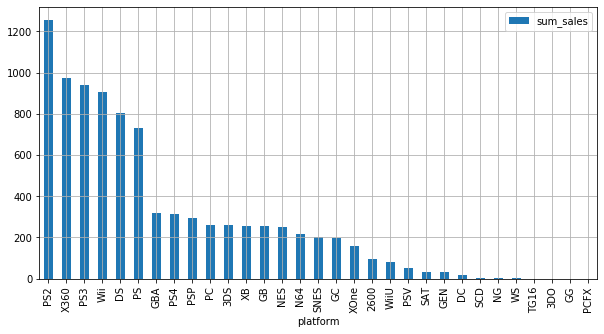

In [23]:
df_games_platform_table.plot(kind='bar', y='sum_sales', grid=True, figsize=(10, 5));

Платформы с наибльшим числом продаж  - DS, PS, PS2, PS3, Wii, X360

Построим распределение продаж игр по годам на выбранных платформах.
Для наглядности построим 2 графика

In [24]:
df_platform_t = df.query('platform == "DS" or platform == "PS" or platform == "PS2" or platform == "PS3" or platform == "Wii" or platform == "X360"')
#df_platform_top
df_platform_top = df_platform_t.query('year_of_release != "NaN" and year_of_release > 1995')
df_platform_top_DS = df_platform_top.query('platform == "DS"')
df_platform_top_PS = df_platform_top.query('platform == "PS"')
df_platform_top_PS2 = df_platform_top.query('platform == "PS2"')
df_platform_top_PS3 = df_platform_top.query('platform == "PS3"')
df_platform_top_Wii = df_platform_top.query('platform == "Wii"')
df_platform_top_X360 = df_platform_top.query('platform == "X360"')

Мы убрали 277 пропущенных строк с данными из 9422 или 3%

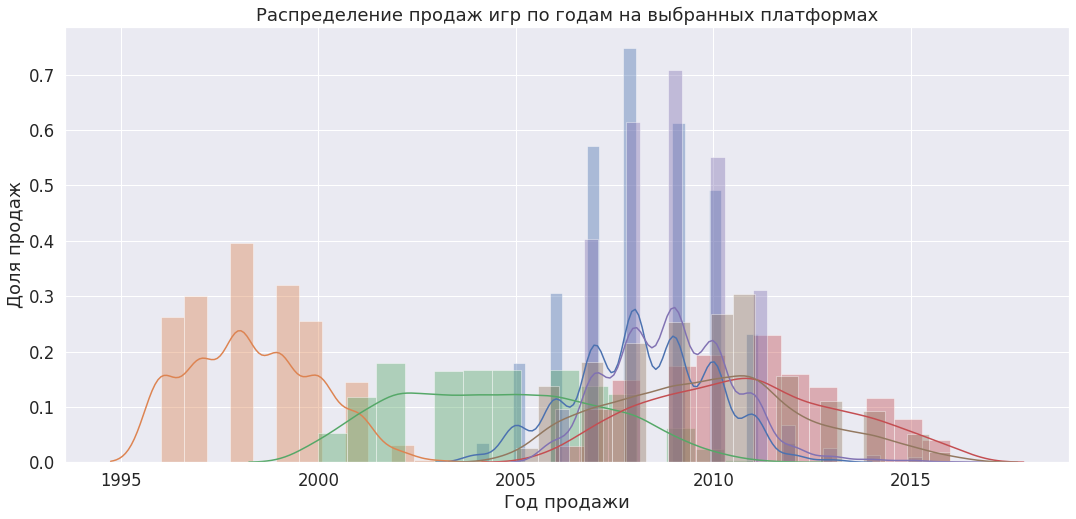

In [25]:
fig = plt.gcf()
fig.set_size_inches(18, 8)
sns.set(font_scale=1.5)

sns.distplot(df_platform_top_DS['year_of_release'])
sns.distplot(df_platform_top_PS['year_of_release'])
sns.distplot(df_platform_top_PS2['year_of_release'])
sns.distplot(df_platform_top_PS3['year_of_release'])
sns.distplot(df_platform_top_Wii['year_of_release'])
sns.distplot(df_platform_top_X360['year_of_release'])
plt.title('Распределение продаж игр по годам на выбранных платформах')
plt.xlabel('Год продажи')
plt.ylabel('Доля продаж');

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

А здесь решение можно было сократить, используя циклы

<div class="alert alert-info" role="alert">
<h2> Ответ_rev.1</h2>

Да, очень много повторений. Постараюсь решить в ближайшее время или доработаю с кураторами этот вопрос
    
</div>

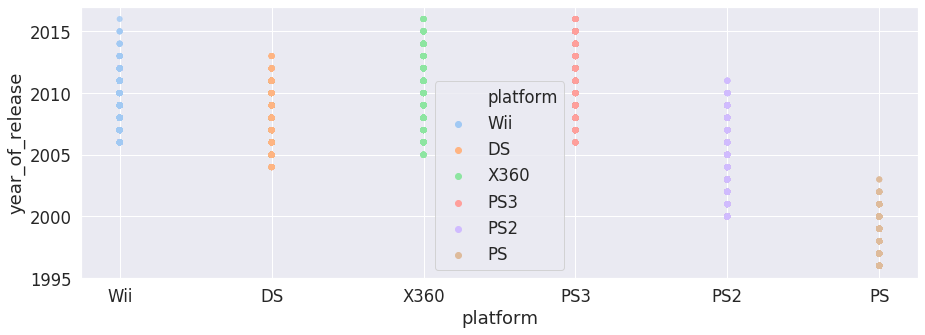

In [26]:
colors = sns.color_palette("pastel")[:df_platform_top.platform.nunique()]
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.scatterplot(x="platform", y="year_of_release",
                hue="platform",
                palette=colors,
                linewidth=0, alpha=0.8,
                data=df_platform_top);

Срок жизни платформы состаляет 8-10лет

Возьмем данные за соответствующий актуальный период в результате исследования предыдущих вопросов и определим, какие платформы лидируют по продажам, растут и падают. Выберем несколько потенциально прибыльных платформ.

Срок жизни платформы составляет около 10 лет: половина этого срока приходится на подъем, а остальная часть - на спад. Возьмём первую часть жизни платформы, на которую приходится её рост. Будем рассматривать срок продаж с 2011 по 2016 год.

In [27]:
df_platform_future = df.query('year_of_release > 2010')
df_platform_future

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_rating,rating_ESRB,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,False,False,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,False,False,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01


Определим суммарные продажи по данным платформам

In [28]:
df_platform_future_sale = df_platform_future.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
print(df_platform_future_sale)

          sum_sales
platform           
3DS          257.81
DS            38.73
PC            97.68
PS2            0.45
PS3          445.57
PS4          314.14
PSP           29.01
PSV           53.81
Wii           95.02
WiiU          82.19
X360         380.38
XOne         159.32


Самые продаваемые игры на платформах 3DS, PS3, PS4, X360 и XOne

Сгруппируем данные продаж по платформам в зависимости от года и посмотрим, какие из них устарели и есть ли новые платформы с потенциалом роста

In [29]:
df_p_s = df_platform_future.groupby(['platform', 'year_of_release']).agg({'platform': ['count'], 'sum_sales': ['sum']})
#display(df_calls_group)
df_p_s

platform sum_sales
                            count       sum
platform year_of_release                   
3DS      2011.0               116     63.20
         2012.0                93     51.36
         2013.0                91     56.57
         2014.0                80     43.76
         2015.0                86     27.78
         2016.0                46     15.14
DS       2011.0               153     26.18
         2012.0                23     11.01
         2013.0                 8      1.54
PC       2011.0               139     35.03
         2012.0                61     23.22
         2013.0                38     12.38
         2014.0                47     13.28
         2015.0                50      8.52
         2016.0                54      5.25
PS2      2011.0                 7      0.45
PS3      2011.0               215    156.78
         2012.0               148    107.36
         2013.0               126    113.25
         2014.0               108     47.76
         2015.0                73     16.82
         2016.0                38      3.60
PS4      2013.0                16     25.99
         2014.0                75    100.00
         2015.0               137    118.90
         2016.0               164     69.25
PSP      2011.0               139     17.82
         2012.0               106      7.69
         2013.0                54      3.14
         2014.0                10      0.24
         2015.0                 3      0.12
PSV      2011.0                18      4.63
         2012.0                53     16.19
         2013.0                63     10.59
         2014.0               100     11.90
         2015.0               110      6.25
         2016.0                85      4.25
Wii      2011.0               143     59.65
         2012.0                31     21.71
         2013.0                12      8.59
         2014.0                 6      3.75
         2015.0                 4      1.14
         2016.0                 1      0.18
WiiU     2012.0                32     17.56
         2013.0                42     21.65
         2014.0                31     22.03
         2015.0                28     16.35
         2016.0                14      4.60
X360     2011.0               206    143.84
         2012.0               106     99.74
         2013.0                75     88.58
         2014.0                63     34.74
         2015.0                35     11.96
         2016.0                13      1.52
XOne     2013.0                19     18.96
         2014.0                61     54.07
         2015.0                80     60.14
         2016.0                87     26.15

Выберем несколько потенциально прибыльных платформ: XOne - старт продаж в 2013 году и все еще высокие показатели продаж, PS4 - старт продаж в 2013 году и самые высокие показатели продаж, 3DS - старт продаж в 2011 году и все еще неплохие показатели продаж.
Общий мировой тренд идет на снижение продаж игр. На фоне этих данных у трех платформ с самыми высокими продажами идет подъем на платформах PS4 и XOne (данные за 2016 год не учитываем, поскольку они могут быть неполными), т.к. эти платформы относительно новые и на платформе 3DS идет спад.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Для начала отделим выбранные платформы от всего датафрейма

In [30]:
df_platform_lider = df.query('platform == "PS4" or platform == "3DS" or platform == "XOne"')

Построим график «ящик с усами» по глобальным продажам игр

Если рассматривать глобальные продажи, медианное значение в 4 раза меньше среднего. 

Построим график «ящик с усами» по продажам игр для PS4

In [33]:
df_platform_lider_PS4 = df_platform_lider.query('platform == "PS4"')

Медианное значение продаж игр для PS4 в 4 раза меньше среднего значения. 

Построим график «ящик с усами» по продажам игр для 3DS

In [36]:
df_platform_lider_3DS = df_platform_lider.query('platform == "3DS"')

Медианное значение продаж игр для 3DS в 4 раза меньше среднего. 

Построим график «ящик с усами» по продажам игр для 3DS

In [39]:
df_platform_lider_XOne = df_platform_lider.query('platform == "XOne"')

Медианное значение продаж игр для XOne в 3 раза меньше среднего. 

In [42]:
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


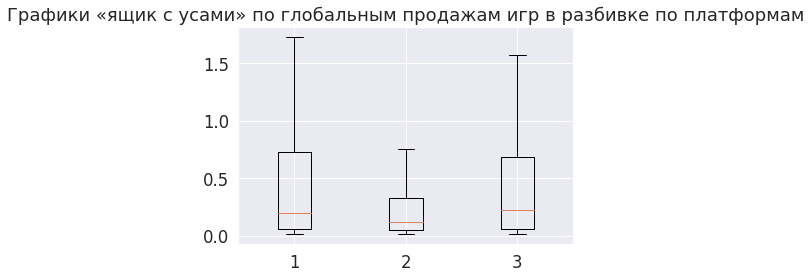

In [43]:
data = [df_platform_lider_PS4['sum_sales'], df_platform_lider_3DS['sum_sales'], df_platform_lider_XOne['sum_sales']]
fig7, ax7 = plt.subplots()
ax7.set_title('Графики «ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax7.boxplot(data, showfliers=False);

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Рассмотрим платформу PS4

In [44]:
df_platform_lider_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_rating,rating_ESRB,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,False,False,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,False,False,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,7.5,False,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False,False,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,5.5,M,0.01


In [45]:
df_PS4_diagramm = df_platform_lider_PS4.loc[:, ['user_score_rating', 'critic_score', 'sum_sales']]
#df_PS4_diagramm

Для данного датафрейма обработаем столбец user_score. Уберем из данных сокращения tbd и присвоим столбцу тип float

In [46]:
PS4_diagramm = df_PS4_diagramm.query('user_score_rating != "tbd" and user_score_rating != False')
PS4_diagramm = PS4_diagramm.query('critic_score != "NaN"')
PS4_diagramm['user_score_rating'] = PS4_diagramm['user_score_rating'].astype('float')
PS4_diagramm.reset_index(drop=True)

,user_score_rating,critic_score,sum_sales
0,8.3,97.0,12.62
1,4.3,82.0,8.58
2,5.7,83.0,7.66
3,5.0,85.0,7.60
4,6.5,87.0,7.17
...,...,...,...
244,2.3,42.0,0.01
245,6.8,70.0,0.01
246,7.5,69.0,0.01
247,7.9,61.0,0.01


Мы убрали 143 пропущенных строк с данными из 392 или 36%

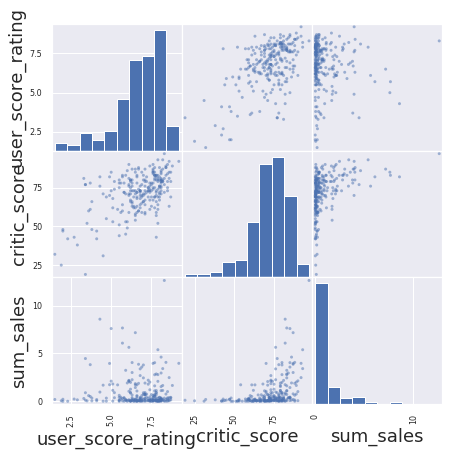

In [47]:
pd.plotting.scatter_matrix(PS4_diagramm, figsize=(7, 7));

In [48]:
PS4_diagramm.corr()

,user_score_rating,critic_score,sum_sales
user_score_rating,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
sum_sales,-0.033625,0.405895,1.000000


df_platform_lider_3DS

In [49]:
df_3DS_diagramm = df_platform_lider_3DS.loc[:, ['user_score_rating', 'critic_score', 'sum_sales']]

In [50]:
diagramm_3DS = df_3DS_diagramm.query('user_score_rating != "tbd" and user_score_rating != False')
diagramm_3DS = diagramm_3DS.query('critic_score != "NaN"')
diagramm_3DS['user_score_rating'] = diagramm_3DS['user_score_rating'].astype('float')
diagramm_3DS.reset_index(drop=True)

,user_score_rating,critic_score,sum_sales
0,8.2,85.0,12.65
1,8.4,90.0,10.81
2,7.2,78.0,9.90
3,8.7,88.0,9.17
4,8.4,86.0,4.59
...,...,...,...
153,7.7,74.0,0.03
154,8.8,88.0,0.03
155,9.0,81.0,0.02
156,2.4,26.0,0.02


Мы убрали 362 пропущенных строк с данными из 520 или 69%

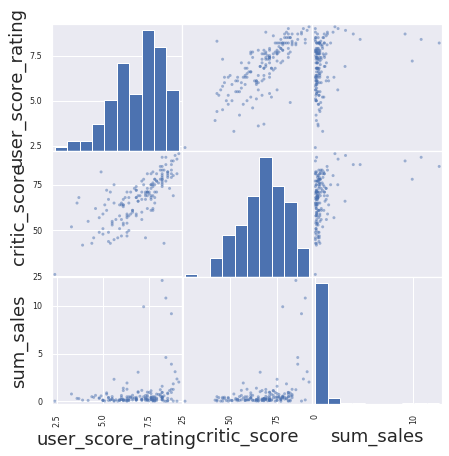

In [51]:
pd.plotting.scatter_matrix(diagramm_3DS, figsize=(7, 7));

In [52]:
diagramm_3DS.corr()

,user_score_rating,critic_score,sum_sales
user_score_rating,1.000000,0.744168,0.233403
critic_score,0.744168,1.000000,0.339824
sum_sales,0.233403,0.339824,1.000000


df_platform_lider_XOne

In [53]:
df_XOne_diagramm = df_platform_lider_XOne.loc[:, ['user_score_rating', 'critic_score', 'sum_sales']]

In [54]:
XOne_diagramm = df_XOne_diagramm.query('user_score_rating != "tbd" and user_score_rating != False')
XOne_diagramm = XOne_diagramm.query('critic_score != "NaN"')
XOne_diagramm['user_score_rating'] = XOne_diagramm['user_score_rating'].astype('float')
XOne_diagramm.reset_index(drop=True)

,user_score_rating,critic_score,sum_sales
0,7.9,97.0,5.47
1,5.4,81.0,5.26
2,6.4,84.0,4.49
3,6.2,88.0,4.22
4,4.1,72.0,3.50
...,...,...,...
160,7.5,66.0,0.01
161,6.3,53.0,0.01
162,6.0,65.0,0.01
163,8.2,63.0,0.01


Мы убрали 82 пропущенные строки с данными из 247 или 33%

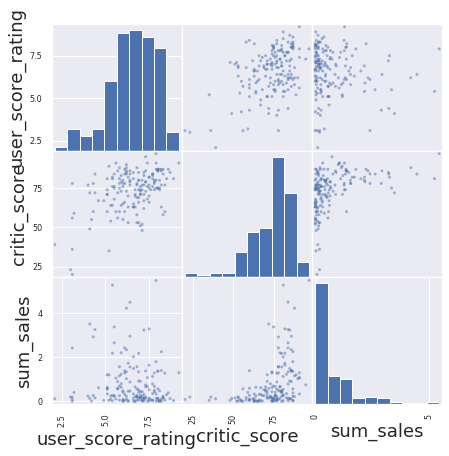

In [55]:
pd.plotting.scatter_matrix(XOne_diagramm, figsize=(7, 7));

In [56]:
XOne_diagramm.corr()

,user_score_rating,critic_score,sum_sales
user_score_rating,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
sum_sales,-0.094003,0.410422,1.000000


Отсутствует зависимость от суммарных продаж и оценок пользователей. Имеется зависимость от суммарных продаж и оценок критиков. Это хорошо наблюдается при высоких продажах, эти игры имеют высокие оценки. Зависимость продаж игр на других платформах соотносится аналогичным образом.

Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры. Изучим, выделяются ли жанры с высокими и низкими продажами. Проанализируем игры за весь период и с 2011 года.

In [57]:
df_ganr = df_platform_lider.groupby(['genre', 'platform']).agg({'sum_sales': ['sum']})
df_ganr

sum_sales
                            sum
genre        platform          
Action       3DS          58.24
             PS4          96.10
             XOne         37.31
Adventure    3DS           4.92
             PS4           6.34
             XOne          2.68
Fighting     3DS          10.56
             PS4           8.65
             XOne          2.45
Misc         3DS          10.99
             PS4           8.19
             XOne          7.43
Platform     3DS          32.53
             PS4           7.69
             XOne          0.93
Puzzle       3DS           5.57
             PS4           0.02
Racing       3DS          14.96
             PS4          12.14
             XOne          9.79
Role-Playing 3DS          84.23
             PS4          28.99
             XOne         10.55
Shooter      3DS           1.29
             PS4          88.56
             XOne         60.33
Simulation   3DS          27.45
             PS4           1.23
             XOne          0.69
Sports       3DS           6.17
             PS4          55.61
             XOne         26.74
Strategy     3DS           2.09
             PS4           0.62
             XOne          0.42

Посмотрим на продажи игр с 2011 года

In [58]:
df_ganr_2011 = df_platform_lider.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
df_ganr_2011

,sum_sales
genre,
Action,191.65
Shooter,150.18
Role-Playing,123.77
Sports,88.52
Platform,41.15
Racing,36.89
Simulation,29.37
Misc,26.61
Fighting,21.66


Для наглядности построим 2 диаграмы 

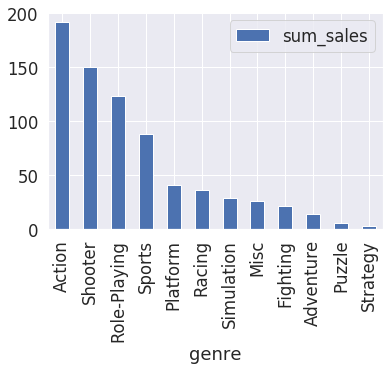

In [60]:
df_ganr_2011.plot(y='sum_sales', kind='bar');

Посмотрим на продажи игр за весь период

In [61]:
df_ganr = df.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
df_ganr

,sum_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


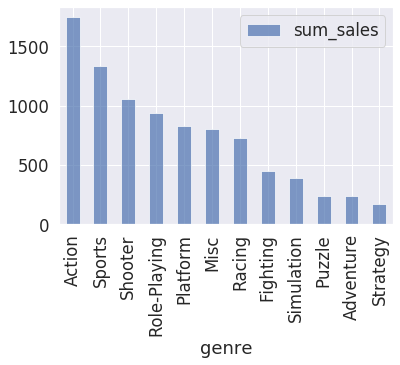

In [63]:
df_ganr.plot(y='sum_sales', kind='bar', grid=True, alpha=.7);

In [64]:
df_ganr_mean = df.pivot_table(index='genre', values='sum_sales', aggfunc='mean').sort_values('sum_sales', ascending=False)
df_ganr_mean

,sum_sales
genre,
Platform,0.932173
Shooter,0.795503
Role-Playing,0.623872
Racing,0.583403
Sports,0.566980
Fighting,0.527126
Action,0.517711
Misc,0.458577
Simulation,0.446701


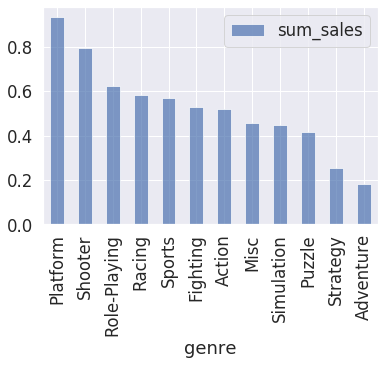

In [65]:
df_ganr_mean.plot(y='sum_sales', kind='bar', grid=True, alpha=.7);

Самые продаваемые игры с 2011 года - это Action, Shooter, Role-Playing и Sports. Самые непопулярные - это Puzzle и Strategy.
Самые продаваемые игры за весь период - это Action, Sports, Shooter, Role-Playing и Platform. Самые непопулярные - Puzzle, Adventure и Strategy. Предпочтения пользователей за многие годы практически не изменились.
Лучше всего продаются игры с жанром Platform и Shooter, хуже всего Adventure и Strategy.

### Вывод по Шагу 3
С 1980 по 1990 год выпускалось незначительное количество игр. С 1990 по 2009 год количество выпускаемых игр постоянно увеличивалось. Пик пришелся на 2008-2009 год: около 1400 выпущенных игр в год. С 2010 года идет плавное снижение количества выпускаемых игр.
Платформы с наибольшим числом продаж: DS, PS, PS2, PS3, Wii, X360.
Срок жизни платформы составляет 8-10 лет.
Потенциально прибыльные платформы: 
XOne - старт продаж в 2013 году и все еще высокие показатели продаж, 
PS4 - старт продаж в 2013 году и самые высокие показатели продаж, 
3DS - старт продаж в 2011 году и все еще неплохие показатели продаж.
Общий мировой тренд идет на снижение продаж игр. На фоне этих данных у трех платформ с самыми высокими продажами идет подъем на платформах PS4 и XOne, т.к. эти платформы относительно новые и на платформе 3DS идет спад.
Медианное значение продаж игр для платформ в 3-4 раза меньше среднего значения. Данное смещение обусловлено небольшим количеством игр с очень большими продажами на рынке.
Отсутствует зависимость от суммарных продаж и оценок пользователей. Имеется зависимость от суммарных продаж и оценок критиков. Это хорошо наблюдается при высоких продажах: эти игры имеют высокие оценки. Зависимость продаж игр на других платформах соотносится аналогичным образом.
Самые продаваемые игры с 2011 года: Action, Shooter, Role-Playing и Sports. Самые непопулярные: Puzzle и Strategy.
Самые продаваемые игры за весь период: Action, Sports, Shooter, Role-Playing и Platform. Самые непопулярные: Puzzle, Adventure и Strategy. Предпочтения пользователей за многие годы практически не изменились

### Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы

In [66]:
top_platform_NA = df.pivot_table(index='platform', values=['na_sales', 'name'], aggfunc={'name':'count', 'na_sales':'sum'}).sort_values('na_sales', ascending=False).head(5)
print(top_platform_NA)

          na_sales  name
platform                
X360        602.47  1262
PS2         583.84  2161
Wii         496.90  1320
PS3         393.49  1331
DS          382.40  2151


In [67]:
share_platform_NA = df['na_sales'].sum() / df['sum_sales'].sum()
print('Доля продаж в Северной Америке: {:.1%}'.format(share_platform_NA))

Доля продаж в Северной Америке: 49.4%


In [68]:
top_platform_EU = df.pivot_table(index='platform', values=['eu_sales', 'name'], aggfunc={'name':'count', 'eu_sales':'sum'}).sort_values('eu_sales', ascending=False).head(5)
print(top_platform_EU)

          eu_sales  name
platform                
PS2         339.29  2161
PS3         330.29  1331
X360        270.76  1262
Wii         262.21  1320
PS          213.61  1197


In [69]:
share_platform_EU = df['eu_sales'].sum() / df['sum_sales'].sum()
print('Доля продаж в Европе: {:.1%}'.format(share_platform_EU))

Доля продаж в Европе: 27.2%


In [70]:
top_platform_JP = df.pivot_table(index='platform', values=['jp_sales', 'name'], aggfunc={'name':'count', 'jp_sales':'sum'}).sort_values('jp_sales', ascending=False).head(5)
print(top_platform_JP)

          jp_sales  name
platform                
DS          175.57  2151
PS          139.82  1197
PS2         139.20  2161
SNES        116.55   239
3DS         100.67   520


In [71]:
share_platform_JP = df['jp_sales'].sum() / df['sum_sales'].sum()
print('Доля продаж в Японии: {:.1%}'.format(share_platform_JP))

Доля продаж в Японии: 14.6%


Самые популярные платформы в Северной Америке: X360, PS2, Wii, PS3, DS с долей продаж 49.4%           
Самые популярные платформы в Европе: PS2, PS3, X360, Wii, PS с долей продаж 27.2%%    
Самые популярные платформы в Японии: DS, PS, PS2, SNES, 3DS с долей продаж 14.6%    
Регион Северная Америка по популярности платформ очень схож с Европой. Самые популярные платформы практически идентичны. Япония сильно различается по популярности платформ от СА и Европы, тут отдают предпочтения платформам из самой Японии, платформа X360 тут не популярна.

Самые популярные жанры

In [72]:
top_genre_NA = df.pivot_table(index='genre', values=['na_sales', 'name'], aggfunc={'name':'count', 'na_sales':'sum'}).sort_values('na_sales', ascending=False).head(5)
print(top_genre_NA)

          na_sales  name
genre                   
Action      879.01  3369
Sports      684.43  2348
Shooter     592.24  1323
Platform    445.50   888
Misc        407.27  1750


In [73]:
top_genre_EU = df.pivot_table(index='genre', values=['eu_sales', 'name'], aggfunc={'name':'count', 'eu_sales':'sum'}).sort_values('eu_sales', ascending=False).head(5)
print(top_genre_EU)

         eu_sales  name
genre                  
Action     519.13  3369
Sports     376.79  2348
Shooter    317.34  1323
Racing     236.51  1249
Misc       212.74  1750


In [74]:
top_genre_JP = df.pivot_table(index='genre', values=['jp_sales', 'name'], aggfunc={'name':'count', 'jp_sales':'sum'}).sort_values('jp_sales', ascending=False).head(5)
print(top_genre_JP)

              jp_sales  name
genre                       
Role-Playing    355.41  1498
Action          161.43  3369
Sports          135.54  2348
Platform        130.83   888
Misc            108.11  1750


Самые популярные жанры игр в Северной Америке: Action, Sports, Shooter, Platform, Misc          
Самые популярные платформы в Европе: Action, Sports, Shooter, Racing , Misc   
Самые популярные платформы в Японии: Role-Playing, Action, Sports, Platform, Misc    
Всерегионы по популярности жанров очень схожи. Самые популярные платформы практически идентичны. В Японии самая популярная платформа Role-Playing, в остальном предпочтения пользователей совпадают.

Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
Присвоим отсутствующим значениям False и сравним продажи с рейтингом и без него

In [75]:
df['rating_ESRB'] = df['rating'].fillna(False)
#df

Сгруппируем наш датафрейм по рейтингам и продажам в регионах. Добавим столбцы в процентном соотношении продаж в регионе в зависимости от рейтинга

In [76]:
df_top_rating_region = df.groupby(['rating_ESRB']).agg({'na_sales':['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
df_top_rating_region.columns = ['na_sales', 'eu_sales', 'jp_sales']
#df_top_rating_region

In [77]:
df_top_rating_region['n_g'] = df_top_rating_region['na_sales'] / df_top_rating_region['na_sales'].sum()
df_top_rating_region['e_g'] = df_top_rating_region['eu_sales'] / df_top_rating_region['eu_sales'].sum()
df_top_rating_region['j_g'] = df_top_rating_region['jp_sales'] / df_top_rating_region['jp_sales'].sum()
share_rating_region_percent = df_top_rating_region.loc[:, ['n_g', 'e_g', 'j_g']]
share_rating_region_percent.columns = ['na_share', 'eu_share', 'jp_share']
share_rating_region_percent.style.format("{:.2%}")

,na_share,eu_share,jp_share
rating_ESRB,,,
False,28.22%,25.32%,64.90%
AO,0.03%,0.03%,0.00%
E,29.37%,29.29%,15.27%
E10+,8.03%,7.78%,3.10%
EC,0.03%,0.00%,0.00%
K-A,0.06%,0.01%,0.11%
M,17.00%,19.96%,4.95%
RP,0.00%,0.00%,0.00%
T,17.26%,17.61%,11.67%


Доля продаж игр в Северной Америке и Европе с рейтингом в примерно в 2 раза больше продаж игр без рейтинга. В Японии доля продаж игр с рейтингом почти в 3 раза ниже, чем без него. В Японии в 2 раза хуже продаются игры с рейтингом E и E10+, в 4 раза хуже с рейтингом M. По всем регионам у игр с рейтингом AO, EC, K-A и RP нулевые продажи.

### Вывод по Шагу 4
Самые популярные платформы в Северной Америке: X360, PS2, Wii, PS3, DS с долей продаж 49.4%           
Самые популярные платформы в Европе: PS2, PS3, X360, Wii, PS с долей продаж 27.2%%    
Самые популярные платформы в Японии: DS, PS, PS2, SNES, 3DS с долей продаж 14.6%    
Регион Северная Америка по популярности платформ очень схож с Европой. Самые популярные платформы практически идентичны. Япония сильно различается по популярности платформ от СА и Европы, тут отдают предпочтения платформам из самой Японии, платформа X360 тут не популярна.
Самые популярные жанры игр в Северной Америке: Action, Sports, Shooter, Platform, Misc          
Самые популярные платформы в Европе: Action, Sports, Shooter, Racing , Misc   
Самые популярные платформы в Японии: Role-Playing, Action, Sports, Platform, Misc    
Всерегионы по популярности жанров очень схожи. Самые популярные платформы практически идентичны. В Японии самая популярная платформа Role-Playing, в остальном предпочтения пользователей совпадают.
Доля продаж игр в Северной Америке и Европе с рейтингом в примерно в 2 раза больше продаж игр без рейтинга. В Японии доля продаж игр с рейтингом почти в 3 раза ниже, чем без него. В Японии в 2 раза хуже продаются игры с рейтингом E и E10+, в 4 раза хуже с рейтингом M. По всем регионам у игр с рейтингом AO, EC, K-A и RP нулевые продажи.

### Шаг 5. Проверим гипотезы

#### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Подработаем данные и уберем значения False и tbd из столбца user_score_rating и присвоим тип float

In [78]:
pd.options.mode.chained_assignment = None
user = df.loc[:, ['platform', 'user_score_rating', 'genre']]
user_score = user.query('user_score_rating != False and user_score_rating != "tbd"')
user_score['user_score_rating'] = user_score['user_score_rating'].astype('float')

In [79]:
user_score

,platform,user_score_rating,genre
0,Wii,8.0,Sports
2,Wii,8.3,Racing
3,Wii,8.0,Sports
6,DS,8.5,Platform
7,Wii,6.6,Misc
...,...,...,...
16681,PC,8.1,Strategy
16692,PC,7.6,Action
16696,PC,5.8,Shooter
16702,PC,7.2,Strategy


Мы убрали 9125 пропущенные строки с данными из 16715 или 54%

Разделим на платформы и сформулируем нулевую и альтернативную гипотезы

In [80]:
user_score_PC = user_score.query('platform == "PC"')

In [81]:
user_score_XOne = user_score.query('platform == "XOne"')

Нулевая гипотеза:
Среднее генеральной совокупности пользовательских рейтингов платформы Xbox One и среднее генеральной совокупности пользовательских рейтингов платформы PC равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по средним пользовательским рейтингам платформ PC и Xbox One. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

Для начала пройдем Тест Левена, который проверяет нулевую гипотезу о том, что все входные выборки взяты из рейтинги платформ с равными дисперсиями. 

In [82]:
from scipy.stats import levene

In [83]:
stat, p = levene(user_score_XOne['user_score_rating'], user_score_PC['user_score_rating'])
p

0.2693951512047048

Значение p говорит о том, что рейтинги платформ имеют равные дисперсии совокупностей. Принимаем значение equal_var=True

In [84]:
from scipy import stats as st

In [85]:
alpha = .05

results = st.ttest_ind(
    user_score_XOne['user_score_rating'], 
    user_score_PC['user_score_rating'],
 equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Средние значения пользовательских рейтингов платформы Xbox One и среднее пользовательских рейтингов платформы PC не равны между собой. Наша гипотеза не подтверждается.

#### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Разделим на датафреймы на жанры и сформулируем нулевую и альтернативную гипотезы

In [86]:
user_score_Action = user_score.query('genre == "Action"')

In [87]:
user_score_Sports = user_score.query('genre == "Sports"')

Нулевая гипотеза:
Среднее генеральной совокупности пользовательских рейтингов жанра Action и среднее генеральной совокупности пользовательских рейтингов жанра Sports равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по средним пользовательским рейтингам жанров Action и Sports. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

Проведем Тест Левена, который проверяет нулевую гипотезу о том, что все входные выборки взяты из рейтинги платформ с равными дисперсиями. 

In [88]:
stat, p = levene(user_score_Action['user_score_rating'], user_score_Sports['user_score_rating'])
p

0.0001736640672727649

Малое значение p говорит о том, что рейтинги жанров имеют не равные дисперсии совокупностей. Принимаем значение equal_var=False

In [89]:
alpha = .05

results = st.ttest_ind(
    user_score_Action['user_score_rating'], 
    user_score_Sports['user_score_rating'],
equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Средние значения пользовательских рейтингов жанра Action и среднее пользовательских рейтингов жанра Sports кардинально не различаются. Наша гипотеза подтверждается.

### Вывод по Шагу 5
Средние значения пользовательских рейтингов платформы Xbox One и среднее пользовательских рейтингов платформы PC не равны между собой. Наша гипотеза не подтверждается.
Средние значения пользовательских рейтингов жанра Action и среднее пользовательских рейтингов жанра Sports кардинально не различаются. Наша гипотеза подтверждается.

### Шаг 5. Общий вывод
<div class="alert alert-info" role="alert">
Мы проанализировали данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Массив данных содержит информацию о названиях игр, платформах, годах выпуска, жанрах игры, продажах в Северной Америке (миллионы проданных копий), Европе (миллионы проданных копий), Японии (миллионы проданных копий) и в других странах (миллионы проданных копий), оценках критиков, оценках пользователей и рейтинге от организации ESRB. 

Посчитали суммарные продажи во всех регионах.
Больше всего продаж в Северной Америке. Больше всего продаж было сделано в 2007-2010 годах, с этого времени они постоянно сокращаются.
С 1980 по 1990 год выпускалось незначительное количество игр. С 1990 по 2009 год количество выпускаемых игр постоянно увеличивалось. Пик пришелся на 2008-2009 год: около 1400 выпущенных игр в год. С 2010 года идет плавное снижение количества выпускаемых игр.
Платформы с наибольшим числом продаж: DS, PS, PS2, PS3, Wii, X360.
Срок жизни платформы составляет 8-10 лет.
Потенциально прибыльные платформы: 
XOne - старт продаж в 2013 году и все еще высокие показатели продаж, 
PS4 - старт продаж в 2013 году и самые высокие показатели продаж, 
3DS - старт продаж в 2011 году и все еще неплохие показатели продаж.
Общий мировой тренд идет на снижение продаж игр. На фоне этих данных у трех платформ с самыми высокими продажами идет подъем на платформах PS4 и XOne, т.к. эти платформы относительно новые и на платформе 3DS идет спад.
Медианное значение продаж игр для платформ в 3-4 раза меньше среднего значения. Данное смещение обусловлено небольшим количеством игр с очень большими продажами на рынке.
Отсутствует зависимость от суммарных продаж и оценок пользователей. Имеется зависимость от суммарных продаж и оценок критиков. Это хорошо наблюдается при высоких продажах: эти игры имеют высокие оценки. Зависимость продаж игр на других платформах соотносится аналогичным образом.
Самые продаваемые игры с 2011 года: Action, Shooter, Role-Playing и Sports. Самые непопулярные: Puzzle и Strategy.
Самые продаваемые игры за весь период: Action, Sports, Shooter, Role-Playing и Platform. Самые непопулярные: Puzzle, Adventure и Strategy. Предпочтения пользователей за многие годы практически не изменились
    
Составили портрет пользователя каждого региона:
Самые популярные платформы в Северной Америке: X360, PS2, Wii, PS3, DS с долей продаж 49.4%           
Самые популярные платформы в Европе: PS2, PS3, X360, Wii, PS с долей продаж 27.2%%    
Самые популярные платформы в Японии: DS, PS, PS2, SNES, 3DS с долей продаж 14.6%    
Регион Северная Америка по популярности платформ очень схож с Европой. Самые популярные платформы практически идентичны. Япония сильно различается по популярности платформ от СА и Европы, тут отдают предпочтения платформам из самой Японии, платформа X360 тут не популярна.
Самые популярные жанры игр в Северной Америке: Action, Sports, Shooter, Platform, Misc          
Самые популярные платформы в Европе: Action, Sports, Shooter, Racing , Misc   
Самые популярные платформы в Японии: Role-Playing, Action, Sports, Platform, Misc    
Всерегионы по популярности жанров очень схожи. Самые популярные платформы практически идентичны. В Японии самая популярная платформа Role-Playing, в остальном предпочтения пользователей совпадают.
Доля продаж игр в Северной Америке и Европе с рейтингом в примерно в 2 раза больше продаж игр без рейтинга. В Японии доля продаж игр с рейтингом почти в 3 раза ниже, чем без него.
Регионы Серерная Америка и Европа очень похожи в своих предпочтениях. 
    
Провериили гипотезы:
Средние значения пользовательских рейтингов платформы Xbox One и среднее пользовательских рейтингов платформы PC не равны между собой. Наша гипотеза не подтверждается.
Средние значения пользовательских рейтингов жанра Action и среднее пользовательских рейтингов жанра Sports кардинально не различаются. Наша гипотеза подтверждается.
    
По результатам нашего анализа при планировании кампании на 2017-й, необходимо обратить внимание на регионы: Северная  Америка и Европа с самыми большими продажами. Самые с потенциально прибыльные платформы: XOne, PS4 и 3DS. Самые востребованые жанры: Action, Sports, Shooter, Platform, Misc. Лучше всего продаются игры с жанром Platform и Shooter, хуже всего Adventure и Strategy.    
</div>